# Homework 2: Moritz Thirfeld, Lorena Puhl, Marco Alban


In [1]:
import matplotlib.pyplot as plt
import numpy as np

The following line has functions that are going to be used along the code.<br>
<b>- cross:</b> The cross product between 3D vectors.<br>
<b>- md:</b> modulus of a 2D vector N. Note that here I am ussing x$\cdot$x instead of x$^{2}$. This is because I have the intention to use this function inside the euler method <i>for loop</i>, and self multiplication is faster than squaring a number in python.<br>
<b>- tot_energy:</b> Returns the total energy of the system<br>

<b>- ecc_RLL:</b> Returns the Runge-Lenz-Laplace vector and the eccentricity (via it's modulus, since it coincides with the eccentricity)<br>
<b>- F:</b> This is the equation of motion of the system. <br>

$\Large\ddot{r} = -\frac{G\cdot M}{|\vec{r}|^{3}}\cdot \vec{r}$

It is written in such a way that it asks for the i and j component and takes the first given component (whether it is x or y) as the corresponding ith and jth component to be computed. Like this:<br>

$\Large F(x,y)=\ddot{r}_{x} = -\frac{G\cdot M}{(x^{2}+y^{2})^{3/2}}\cdot x$<br>
$\Large F(y,x)=\ddot{r}_{y} = -\frac{G\cdot M}{(x^{2}+y^{2})^{3/2}}\cdot y$<br>

This is done just for not writting two different functions, when with one it is enough.<br>

<b>- euler:</b> forward euler method. S and W are the position and velocity respectively, and now and prev states whether it is $S_{n}$ or $S_{n-1}$ for example. It is written in a way that it expects you to input a single coordinate each time, in contrast to the way we worte leapfrog methods, since they expect you to input both x and y axis at the same time. Also, it expects you to input the differential equation to be solved ("deq").<br>

<b>- leapfrog_dkd and leapfrog_kdk:</b> Leapfrog kick drift kick and drift kick drift methods. S and W are the position and velocity respectively, and <b>n</b>, <b>1_2</b> and <b>p</b> states whether it is $S_{n+1}$, $S_{n+\frac{1}{2}}$ or $S_{n}$ for example. They expect x and y axis simultaneously since we need synchronization between the half steps. It expects you to input the differential equation to be solved ("deq")<br>

<b>- hw:</b> This function receives an initial velocity, a time step, and the integration method, and returns the error in the total energy and lists of positions and velocities. This is going to be used with the HOMEWORK function (described below) to solve questions a and b of the homework. Note that this is done for two orbits (as asked), so the orbital period <b>To</b> in the local variable tstep=np.arange(dt,2*To,dt) is multilplied by two for having two orbits for all solutions.<br>


<b>- HOMEWORK</b> Receives a list of velocities and a list of different time steps and the method of integration. It takes the <b>hw</b> function and uses the returned error total energy result (by the second orbit) and plots it as a function of the time step and for different velocities. It draws it in a logarithmic and linear fashion.



In [2]:
def cross(a,b):#Cross product. a and b are 3D vectors
    a1,a2,a3=a#Unpacking values of the vectors
    b1,b2,b3=b
    return [a2*b3-a3*b2,a3*b1-a1*b3,a1*b2-a2*b1]#i,j,k direction

def md(x,y): return  (x*x+y*y)**0.5 #modulus
def tot_energy(vx,vy,x,y): return mu*md(vx,vy)**2-G*M*mu/md(x,y)
def ecc_RLL(vx,vy,x,y): #eccentricity Runge-Lenz-Laplace vector
    Rvec=np.column_stack((x,y,np.zeros(len(x))))
    Vvec=np.column_stack((vx,vy,np.zeros(len(x))))
    Lvec=mu*np.array([cross(Rvec[i],Vvec[i]) for i in range(len(x))])
    Jvec=Lvec/mu
    VcrossJ=np.array([cross(Vvec[i],Jvec[i]) for i in range(len(x))])
    Evec=np.array([VcrossJ[i]/(G*M)-Rvec[i]/md(x[i],y[i]) 
    for i in range(len(x))])
    return Evec,md(Evec[:,0],Evec[:,1])
    #ex,ey,ez=Evec[:,0],Evec[:,1],Evec[:,2]


def F(x,y): return -G*M*x/(md(x,y)**3)#eq of motion for x axis
#to have Fx, put x first. To have Fy, put y first
#def Fy(x,y,t): return -G*M*y/(md(x,y)**3)#eq of motion for y axis
#I used x*x instead of x**2 since pow is slower than self multiplication.
def euler(Sprev,Wprev,deq,dt):
    #S and W stand for position and velocity
    #prev and now, to the n-1 and n step
    #deq=differential equation used
    Snow=Sprev+dt*Wprev
    Wnow=Wprev+dt*deq
    return Snow,Wnow

def leapfrog_dkd(Sprev,Wprev,deq,dt):#driff kick driff
    #S and W as lists with X,Y positions
    #p=previos (i),n=now (i+1),1_2= (i+1/2)
    Spx=Sprev[0];Spy=Sprev[1]
    Wpx=Wprev[0];Wpy=Wprev[1]

    S1_2x=Spx+Wpx*dt*0.5
    S1_2y=Spy+Wpy*dt*0.5
    Wnx=Wpx+deq(S1_2x,S1_2y)*dt
    Wny=Wpy+deq(S1_2y,S1_2x)*dt
    Snx=S1_2x+Wnx*dt*0.5
    Sny=S1_2y+Wny*dt*0.5
    Snow=[Snx,Sny];Wnow=[Wnx,Wny]
    return Snow,Wnow

def leapfrog_kdk(Sprev,Wprev,deq,dt):#driff kick driff
    #S and W as lists with X,Y positions
    #p=previos (i),n=now (i+1),1_2= (i+1/2)
    Spx=Sprev[0];Spy=Sprev[1]
    Wpx=Wprev[0];Wpy=Wprev[1]

    W1_2x=Wpx+deq(Spx,Spy)*dt*0.5
    W1_2y=Wpy+deq(Spy,Spx)*dt*0.5
    Snx=Spx+W1_2x*dt
    Sny=Spy+W1_2y*dt
    Wnx=W1_2x+deq(Snx,Sny)*dt*0.5
    Wny=W1_2y+deq(Sny,Snx)*dt*0.5
    Snow=[Snx,Sny];Wnow=[Wnx,Wny]
    return Snow,Wnow


def hw(Vo,dt,method):#from inside maybe with a dictionary add to manually chage the initial conditions
    x=[Ro];y=[0];vx=[0];vy=[Vo]#Creating lists for positions and velocities
    tstep=np.arange(dt,2*To,dt)#to ensure the for loop iterates until  one orbital period
    if method==euler:
#this if statement is just because euler and leapfrog methods where written in a slightly different structure
        for i in range(len(tstep)):#range(steps):
            xi,vxi=method(x[i],vx[i],F(x[i],y[i]),dt);x.append(xi);vx.append(vxi)
            yi,vyi=method(y[i],vy[i],F(y[i],x[i]),dt);y.append(yi);vy.append(vyi)
    elif method==leapfrog_dkd or method==leapfrog_kdk:
        for i in range(len(tstep)):
            [xi,yi],[vxi,vyi]=leapfrog_dkd([x[i],y[i]],[vx[i],vy[i]],F,dt)
            x.append(xi);vx.append(vxi);y.append(yi);vy.append(vyi)
    x=np.array(x);y=np.array(y)
    vx=np.array(vx);vy=np.array(vy)
    Etot=tot_energy(vx,vy,x,y)
    Err_Etot=abs(Etot[0]-Etot[1])#Error in energy at the end of the orbit
    #of course, knowing that the energy at the beginning has no error
    return Err_Etot,x,y,vx,vy#Error in total energy, lists of positions and velocities

def HOMEWORK(velocities, time_steps, method):
    #velocities and time_steps are lists of the range of velocities and
    #timesteps as asked. The input of the velocities are normalized to Vo
    #So we expect to have velocities of 0.7, 0.8, 1.2 for example...
    #such that they are all fractions of Vo
    
    #Getting the string name of our selected method
    eu='Euler';Lkdk='Leapfrog kick drift kick';Ldkd='Leapfrog drift kick drift'
    method_name= eu if method==euler else (Lkdk if method==leapfrog_kdk else Ldkd)
    
    errs=[[hw(Vos,hs,method)[0] for hs in time_steps] for Vos in  velocities]
    #Creating the figure for a plot
    f,(ax1,ax2)=plt.subplots(1,2,figsize=(10,6),dpi= 100)

    plt.suptitle('Error in total energy as a function of time step for\n'+
                 'three different eccentricities/ (initial velocities) \n'
                 'using the '+method_name+' method.',fontweight="bold")
    #plot many lines
    for Vo_h in range(len(errs)):
        ax1.plot(many_h,errs[Vo_h],label='V_ini ≈ '+str(round(many_Vo[Vo_h],2))+
                 '*Vo, e ≈ '+str(round(ecc_RLL([0.0],many_Vo[Vo_h]*Vo,[Ro],[0.0])[1][0],2)))
        ax2.plot(many_h,errs[Vo_h],label='V_ini ≈ '+str(round(many_Vo[Vo_h],2))+
                 '*Vo, e ≈ '+str(round(ecc_RLL([0.0],many_Vo[Vo_h]*Vo,[Ro],[0.0])[1][0],2)))
    #I only round the printing of the velocities in the plot for better visualization.
    #ax1.gca().set_aspect("equal")
    ax1.set_title('Logarithmic ');ax2.set_title('Linear')
    ax1.set_yscale('log');ax1.set_xscale('log')
    ax2.set_yscale('linear');ax2.set_xscale('linear')
    ax1.set_xlabel('Time_step Δt');ax1.set_ylabel('Error in total energy')
    ax2.set_xlabel('Time_step Δt');ax2.set_ylabel('Error in total energy')
    f.tight_layout(rect=[0, 0.03, 1, 0.9])
    ax1.legend();ax2.legend();plt.show()


<b>Initial conditions and global constants:</b><br>

Here <b>Vo</b> is a constat for all this program (as the other variables below). However, we emphasize in Vo since it is the required initial velocity for computing circular orbits... <br>

Later, when plotting the different velocities for the solution of the homework, all the initial velocities are going to be fractions of Vo.

In [3]:
G=1;Ro=1
m1=1;m2=1
M=m1+m2#2#20
mu=m1*m2/M
Vo=1.0*np.sqrt(G*M/Ro)#for circular orbit, Etot=0
ecce=ecc_RLL([0.0],[Vo],[Ro],[0.0])[1][0]#eccentricity
a_=Ro/(1-ecce) if Vo>=np.sqrt(G*M/Ro) else Ro/(1+ecce)#semi major axis
#This will know if the particle started at the perihelion (first if), or aphelion (else statement)
#With this, I can compute the period, to study the behavior for TWO orbital periods, as asked in question a.
To=2*np.pi*np.sqrt(a_**3/(G*M))#orbital period
#Note that in the hw function, the local variable tstep is the one who is asked to integrate over two orbits

<b>Here we define a wide range of time steps between different orders of magnitude and three different eccentricities (varying the initial velocity) as asked.</b>

In [4]:
many_h=np.linspace(1e-4,0.1,10)
many_Vo=np.linspace(0.8,1.2,3)#*Vo inside the function HOMEWORK
#many_Vo=np.linspace(0.6,1.4,10)#Use this to span more velocities

<b>Using the "HOMEWORK" function to plot solution for question a) </b><br>

Comment on the result: This is consistent on what one would expect. The error in the total energy gets higher as the time step gets higher. And this has a linear behaviour in the logarithmic plot, as the error also is more accumulated as the time step increases. The error increases for higher velocities

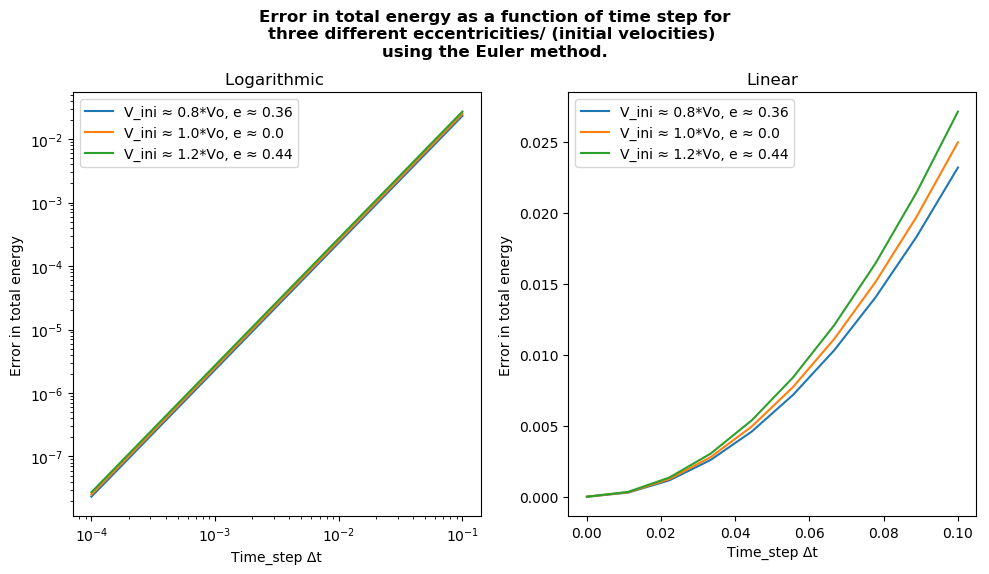

In [5]:
HOMEWORK(many_Vo,many_h,euler)

<b>Using the "HOMEWORK" function to plot solution for question a) </b><br>

Comment on the result: The error in the total energy gets higher as the time step gets higher, as expected. However, we can see here that the errr accumulated is lower than comparing with the Euler method. Also comparing with euler method, the error now increases for lower velocities.<br>

We tried to input more velocities and actually see that the error is sensitive to the initial velocity but not exactly to eccentricity.

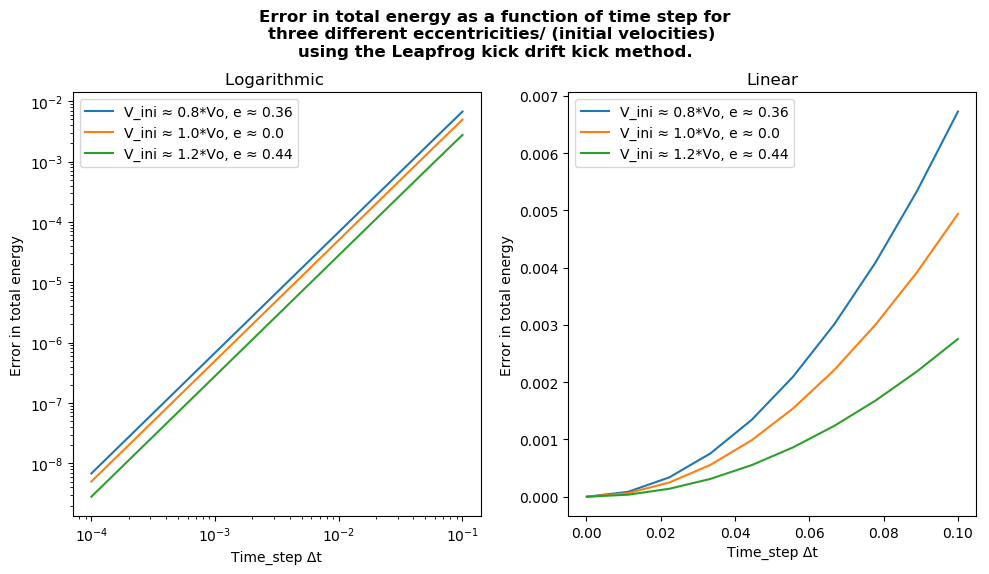

In [6]:
HOMEWORK(many_Vo,many_h,leapfrog_kdk)

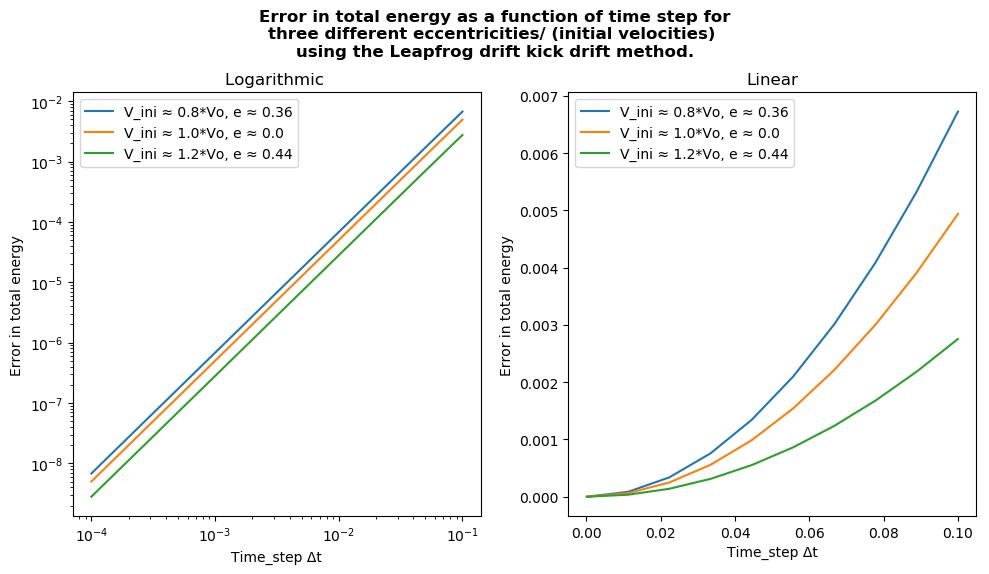

In [7]:
HOMEWORK(many_Vo,many_h,leapfrog_dkd)

<b>Here we just plot how the two orbits for each timestep for two different methods look like. Clearly leapfrog is doing a better job. You can see that Leapfrog solutions are almost all located together, suggesting that the positions are well resolved for almost all those timesteps used.</b><br>

Note: This considers ciruclar orbits.

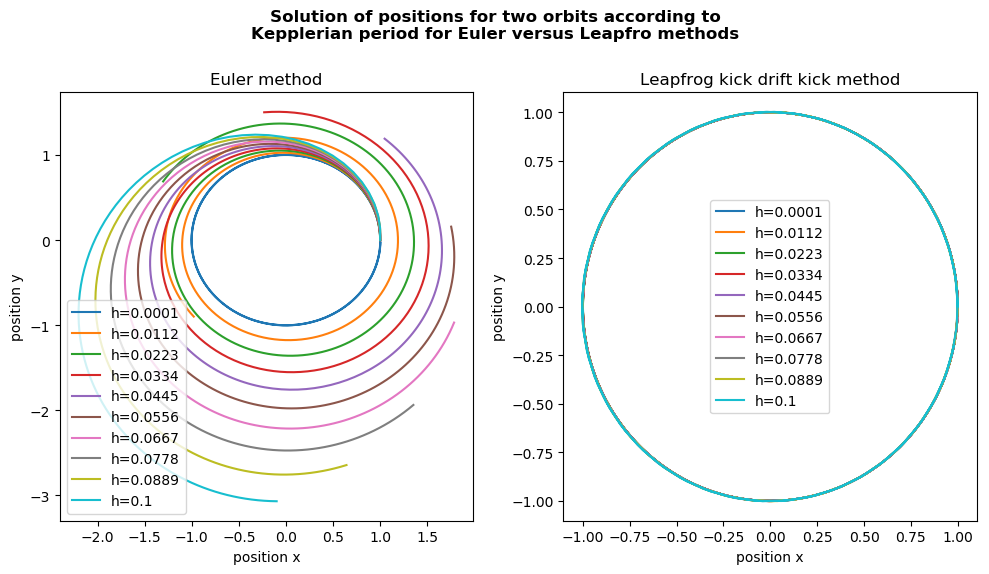

In [8]:
#This supports that the best result is with leapfrog

f,(ax1,ax2)=plt.subplots(1,2,figsize=(10,6),dpi= 100)

for h in many_h:
    jj1,xi1,yi1,vxi1,vyi1=hw(Vo,h,euler)#For Euler#"jj" is not used, since it is the error in energy
    jj2,xi2,yi2,vxi2,vyi2=hw(Vo,h,leapfrog_kdk)#for leapfrog kdk
    ax1.plot(xi1,yi1,label='h='+str(round(h,4)))
    ax2.plot(xi2,yi2,label='h='+str(round(h,4)))
    ax1.set_xlabel('position x');ax1.set_ylabel('position y')
    ax2.set_xlabel('position x');ax2.set_ylabel('position y')
    ax1.set_title('Euler method');ax2.set_title('Leapfrog kick drift kick method')
    #ax2.set_xlim(-1.025,-0.975);ax2.set_ylim(-0.025,0.025)#uncomment this to zoom in leapfrog orbits
    ax1.legend();ax2.legend()
plt.suptitle('Solution of positions for two orbits according to\n'+
             'Kepplerian period for Euler versus Leapfro methods',fontweight="bold")
f.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.show()
#plt.plot(many_h,errs);plt.show()